# Показатель наклона ФПР 
### для модельных ливней с углами 00-20 град.

In [1]:
!pwd
!date

/home/sphere/Model/Code/02-DrawLDF/DrawSum
Чтв Апр 27 19:15:28 MSK 2017


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np
from math import sqrt 

In [4]:
#Прочитать файл 
filename = 'LDF_00-20.csv'
data = pd.read_csv(filename, index_col=0)
print(data.shape)
data[:3]

,energy,angle,par,num,0,1,2,3,4,5,...,330,331,332,333,334,335,336,337,338,339
0,10,00-20,p,0,47800000.0,302830000.0,425060000.0,417700000.0,415640000.0,576890000.0,...,205109.0,128693.0,90893.0,153502.0,62606.0,96954.0,35205.0,34983.0,17670.0,2233.0
1,10,00-20,p,1,24450000.0,164200000.0,252170000.0,262150000.0,272326000.0,393928000.0,...,451952.0,285387.0,201523.0,339354.0,138387.0,214875.0,77387.0,76346.0,38015.0,4347.0
2,10,00-20,p,2,23290000.0,152700000.0,227150000.0,232489000.0,239184000.0,343355000.0,...,501182.0,315826.0,222997.0,375008.0,153155.0,238107.0,85490.0,84792.0,42366.0,5219.0


In [9]:
def calculateSum(ldf):
    service = ['energy', 'angle', 'par', 'num']
    ldf_param = [x for x in data if x not in service]

    energy   = ldf['energy'].values[0]
    particle = ldf['par'].values[0]
    angle    = ldf['angle'].values[0]
    num      = ldf['num'].values[0]
    a        = ldf[ldf_param].values[0]
    
    step = 2.5 ## 2.5 m in step
    Q = 0
    Q25 = 0
    Q50 = 0
    QR25_130  = 0
    QR50_130 = 0
    
    for i in range (len(a)):
        Q   += a[i]
        r = i * step
        
        if(r <= 25):
            Q25 += a[i]
        if(r <= 50):
            Q50 += a[i]

        if((r > 25) & (r < 130)):
            QR25_130  += a[i]
        if((r > 50) & (r < 130)):
            QR50_130 += a[i]

    return [particle, energy, angle, num, Q, Q25, Q50, QR25_130, QR50_130 ]

In [10]:
res = []
for i in range(data.shape[0]):
    res.append(calculateSum(data[data.index == i]))

In [11]:
q  = pd.core.frame.DataFrame(res, columns=['part', 'energy', 'angle', 'n','Q', 'Q25', 'Q50', 'QR25_130', 'QR50_130'])
q['eta25_130'] = q.Q25 / q.QR25_130
q['eta50_130'] = q.Q50 / q.QR50_130
print(q.shape)
q[:4]

,part,energy,angle,n,Q,Q25,Q50,QR25_130,QR50_130
0,p,10,00-20,0,2.678915e+10,4.687884e+09,9.312693e+09,1.299237e+10,8.367557e+09
1,p,10,00-20,1,3.257344e+10,3.252542e+09,7.433032e+09,1.458278e+10,1.040229e+10
2,p,10,00-20,2,3.090447e+10,2.841568e+09,6.441772e+09,1.325523e+10,9.655023e+09
3,p,10,00-20,3,3.116417e+10,3.832174e+09,8.340468e+09,1.452079e+10,1.001250e+10


In [16]:
q.to_csv("eta_25-50-130_00-20.csv")

### Нарисуем

In [ ]:
import seaborn as sns

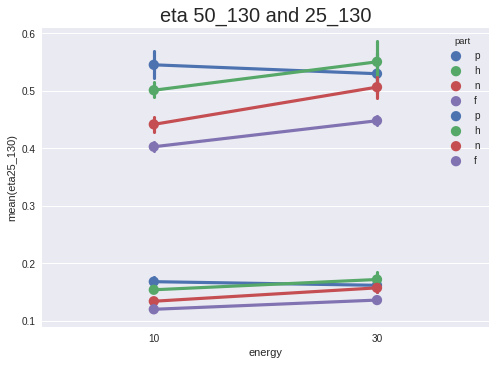

In [53]:
sns.pointplot(x="energy", y="eta50_130", hue="part", data=q);
sns.pointplot(x="energy", y="eta25_130", hue="part", data=q);
plt.title("eta 50_130 and 25_130", size =20);

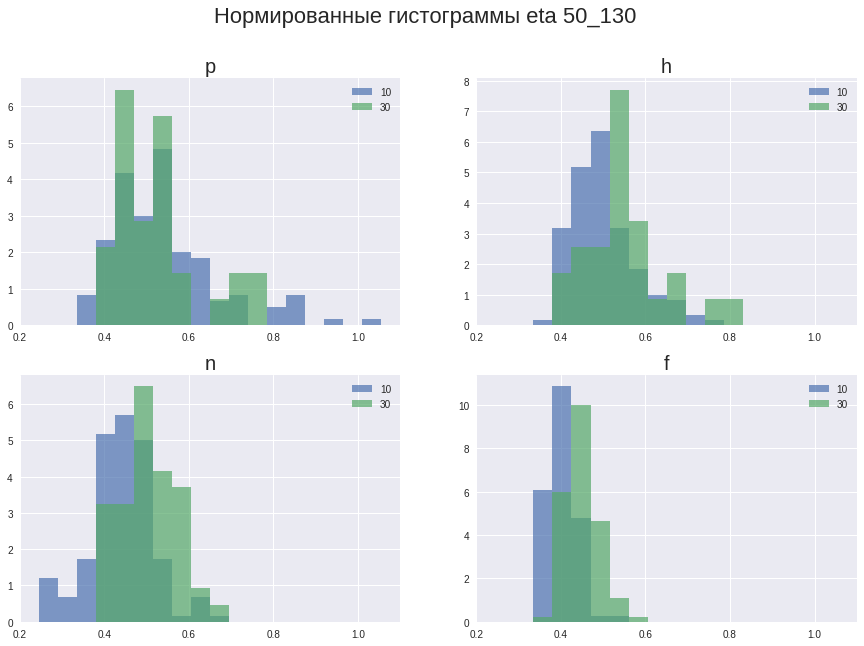

In [98]:
plt.figure(figsize=(15,10))
i = 0
for part in ['p','h','n','f']:
    plt.subplot(2,2,1+i)
    for ener in [10,30]:
        plt.hist(q.eta50_130[(q.energy==ener) & (q.part == part)], range=[0.2, 1.1], bins=20, alpha=0.7,  normed=True,label = str(ener) )
    plt.legend()
    plt.xlim(0.2,1.1)
    name = part
    plt.title(name, size = 20);
    i += 1
plt.suptitle('Нормированные гистограммы eta 50_130', size=22);

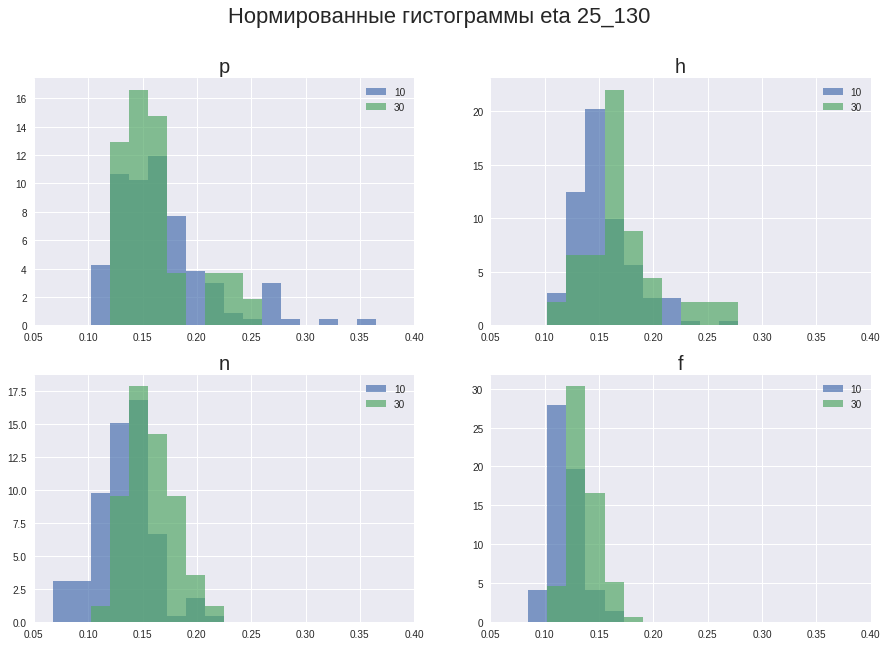

In [99]:
plt.figure(figsize=(15,10))
i = 0
for part in ['p','h','n','f']:
    plt.subplot(2,2,1+i)
    for ener in [10,30]:
        plt.hist(q.eta25_130[(q.energy==ener) & (q.part == part)],range=[0.05, 0.4], bins=20, alpha=0.7, normed=True, label = str(ener) )
    plt.legend()
    plt.xlim(0.05,0.4)
    name = part
    plt.title(name, size = 20);
    i += 1
plt.suptitle('Нормированные гистограммы eta 25_130', size=22);

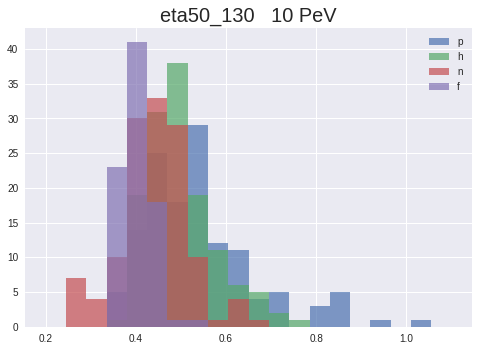

In [103]:
for part in ['p','h','n','f']:
    plt.hist(q.eta50_130[ (q.energy==10) & (q.part == part) ],range=[0.2, 1.1], bins=20,alpha=0.7, label = part)
plt.legend()
plt.title("eta50_130   10 PeV", size = 20);

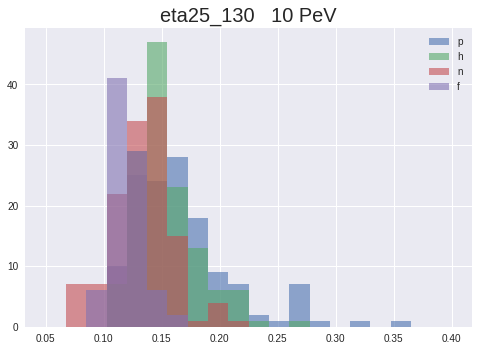

In [102]:
for part in ['p','h','n','f']:
    plt.hist(q.eta25_130[ (q.energy==10) & (q.part == part) ], range=[0.05, 0.4], bins=20,alpha = 0.6,label = part)
plt.legend()
plt.title("eta25_130   10 PeV", size = 20);

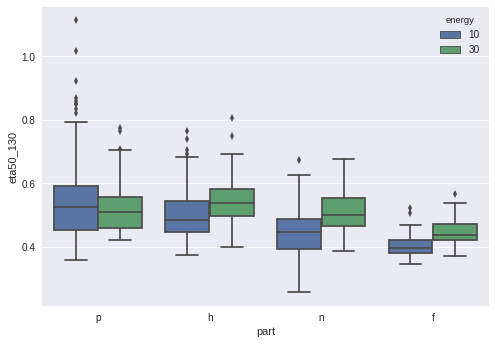

In [43]:
tmp = q[['part', 'energy','eta50_130']]
sns.boxplot(x="part", y="eta50_130", hue="energy", data=tmp);

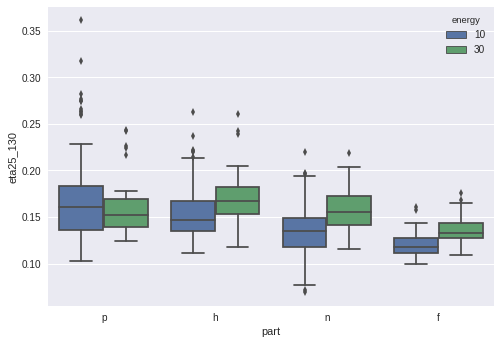

In [44]:
tmp = q[['part', 'energy','eta25_130']]
sns.boxplot(x="part", y="eta25_130", hue="energy", data=tmp);

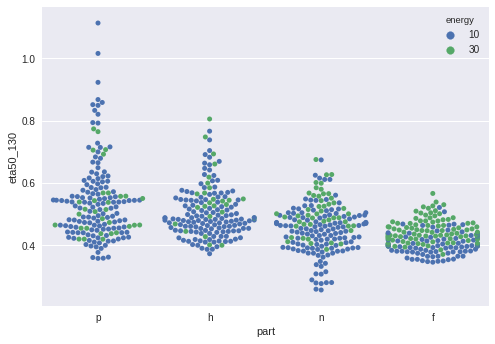

In [24]:
sns.swarmplot(x="part", y="eta50_130", hue="energy", data=q);

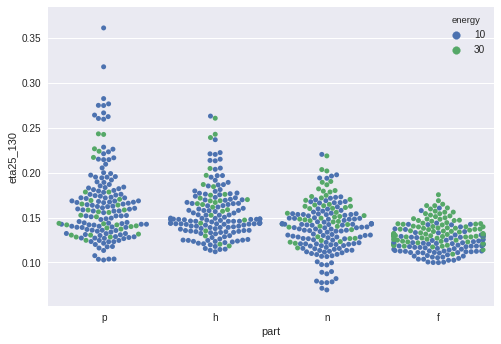

In [25]:
sns.swarmplot(x="part", y="eta25_130", hue="energy", data=q);